In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import healpy as hp
import numpy as np

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('ewok_1004_sqlite.db')
outDir = 'optm5'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
filters = ['u','g','r','i','z','y']
slicer = slicers.HealpixSlicer(nside=64)
plotter = plots.HealpixSkyMap()
metric1 = metrics.Coaddm5Metric(m5Col='fiveSigmaDepth')
metric2 = metrics.Coaddm5Metric(m5Col='m5Optimal', metricName='Optimal m5')
summaryList = [metrics.MedianMetric()]
for filterName in filters:
    sql = 'filter="%s"' % filterName
    bundleList.append(metricBundles.MetricBundle(metric1,slicer,sql, plotFuncs=[plotter], summaryMetrics=summaryList))
    bundleList.append(metricBundles.MetricBundle(metric2,slicer,sql, plotFuncs=[plotter], summaryMetrics=summaryList))

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database with constraint filter="y"
Found 446302 visits
Running:  ['opsim_CoaddM5_y_HEAL', 'opsim_Optimal_m5_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="r"
Found 539071 visits
Running:  ['opsim_CoaddM5_r_HEAL', 'opsim_Optimal_m5_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="g"
Found 247084 visits
Running:  ['opsim_Optimal_m5_g_HEAL', 'opsim_CoaddM5_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="u"
Found 182081 visits
Running:  ['opsim_Optimal_m5_u_HEAL', 'opsim_CoaddM5_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="i"
Found 539793 visits
Running:  ['opsim_CoaddM5_i_HEAL', 'opsim_Optimal_m5_i_HEAL

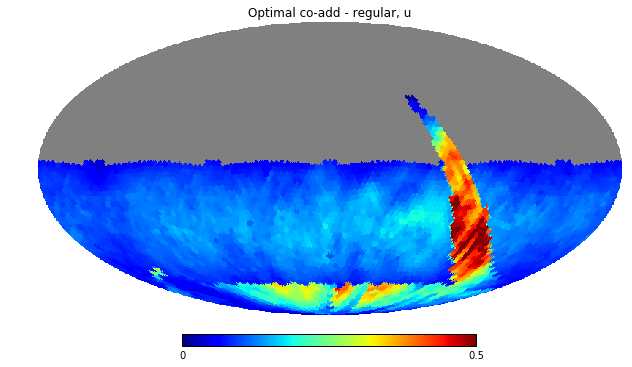

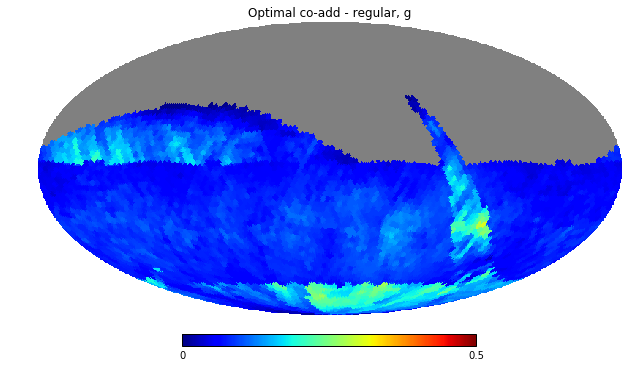

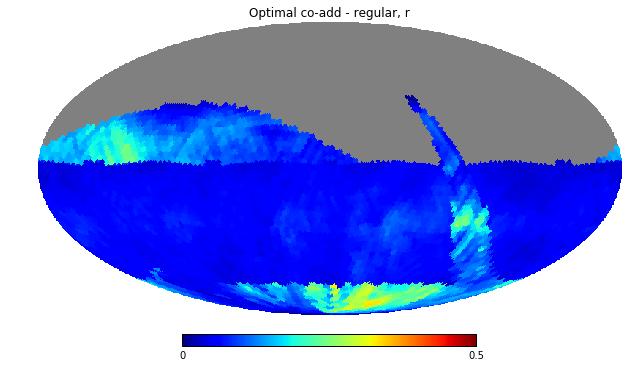

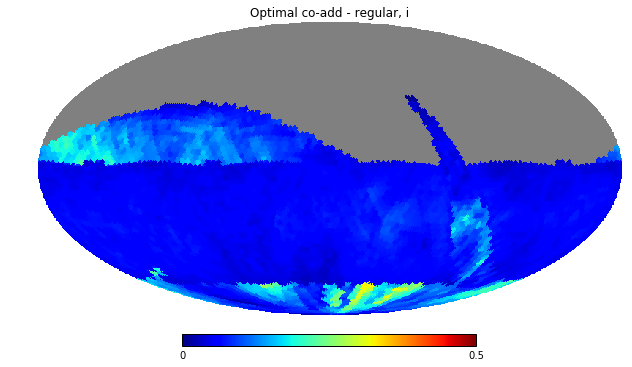

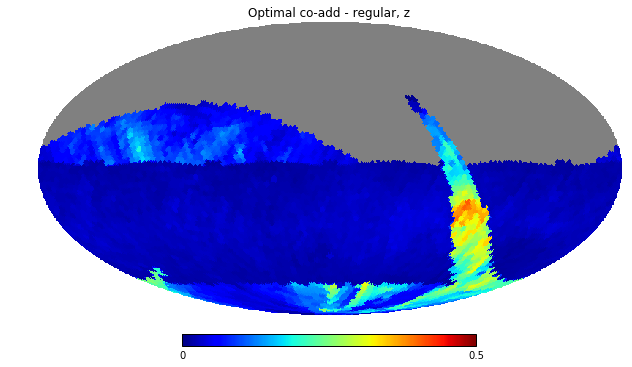

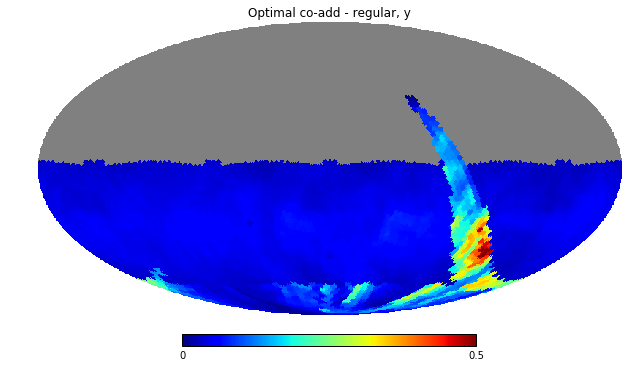

In [5]:
for i,filtername in enumerate(filters):
    newmap = bundleList[i*2+1].metricValues-bundleList[i*2].metricValues
    newmap[np.where(bundleList[i*2+1].metricValues.mask == True)] = hp.UNSEEN
    hp.mollview(newmap, 
                title='Optimal co-add - regular, %s' % filtername, min=0,max=.5)

In [6]:
print 'filter,  Optimal m5, Regular m5, diff'
for i,filtername in enumerate(filters):
    optimal = bundleList[i*2+1].summaryValues['Median']
    regular = bundleList[i*2].summaryValues['Median']
    print '%s, %.2f, %.2f, %.2f' % (filtername, optimal, regular, optimal-regular)

filter,  Optimal m5, Regular m5, diff
u, 25.57, 25.46, 0.12
g, 27.01, 26.93, 0.08
r, 27.13, 27.07, 0.06
i, 26.38, 26.32, 0.05
z, 25.20, 25.17, 0.03
y, 24.48, 24.43, 0.05


In [8]:
bundleList = []
filters = ['u','g','r','i','z','y']
slicer = slicers.HealpixSlicer(nside=64, lonCol='ditheredRA', latCol='ditheredDec')
stacker = stackers.M5OptimalStacker()
plotters = [plots.HealpixSkyMap(), plots.HealpixHistogram()]
metric1 = metrics.OptimalM5Metric()
metric2 = metrics.OptimalM5Metric(normalize=True, metricName='PercentBehind')
summaryList = [metrics.MedianMetric()]
plotDict={'colorMin':0., 'colorMax':40.}
for filterName in filters:
    sql = 'filter="%s"' % filterName
    bundleList.append(metricBundles.MetricBundle(metric1,slicer,sql, plotFuncs=plotters, 
                                                 summaryMetrics=summaryList,plotDict=plotDict,
                                                 stackerList=[stacker]))
    bundleList.append(metricBundles.MetricBundle(metric2,slicer,sql, plotFuncs=plotters, 
                                                 summaryMetrics=summaryList, plotDict=plotDict,
                                                 stackerList=[stacker]))

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with constraint filter="y"
Found 446302 visits
Running:  ['opsim_PercentBehind_y_HEAL', 'opsim_OptimalM5_fiveSigmaDepth_m5Optimal_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="r"
Found 539071 visits
Running:  ['opsim_PercentBehind_r_HEAL', 'opsim_OptimalM5_fiveSigmaDepth_m5Optimal_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="g"
Found 247084 visits
Running:  ['opsim_OptimalM5_fiveSigmaDepth_m5Optimal_g_HEAL', 'opsim_PercentBehind_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter="u"
Found 182081 visits
Running:  ['opsim_PercentBehind_u_HEAL', 'opsim_OptimalM5_fiveSigmaDepth_m5Optimal_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Quer

Optimal bin calculation tried to make 821 bins, returning 200
Optimal bin calculation tried to make 479 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="y" sqlconstraint now.
Plotting complete.

Optimal bin calculation tried to make 261 bins, returning 200
Optimal bin calculation tried to make 593 bins, returning 200



Plotting figures with filter="r" sqlconstraint now.
Plotting complete.

Optimal bin calculation tried to make 494 bins, returning 200
Optimal bin calculation tried to make 203 bins, returning 200



Plotting figures with filter="g" sqlconstraint now.
Plotting complete.

Optimal bin calculation tried to make 325 bins, returning 200
Optimal bin calculation tried to make 1844 bins, returning 200



Plotting figures with filter="u" sqlconstraint now.
Plotting complete.

Optimal bin calculation tried to make 276 bins, returning 200
Optimal bin calculation tried to make 399 bins, returning 200



Plotting figures with filter="i" sqlconstraint now.
Plotting complete.

Optimal bin calculation tried to make 355 bins, returning 200
Optimal bin calculation tried to make 688 bins, returning 200



Plotting figures with filter="z" sqlconstraint now.
Plotting complete.


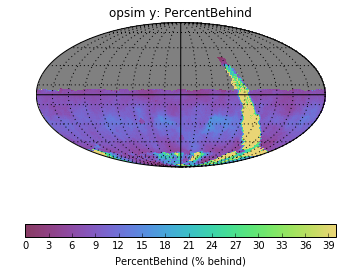

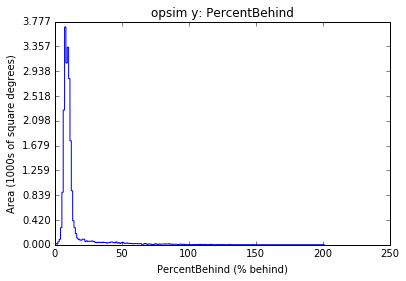

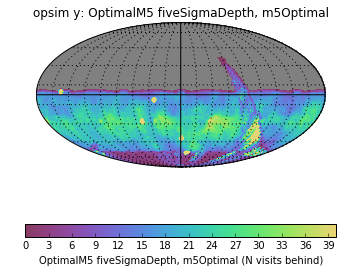

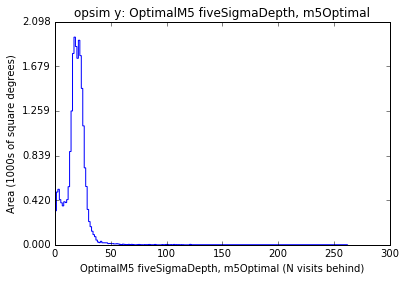

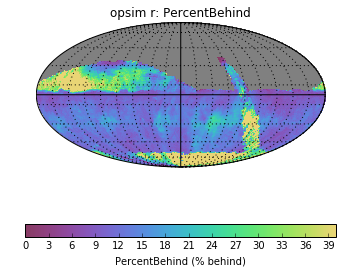

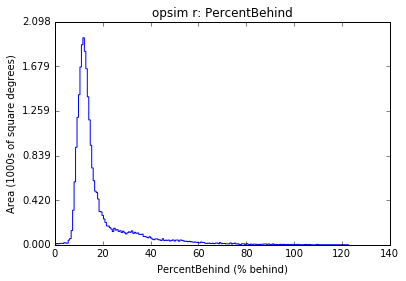

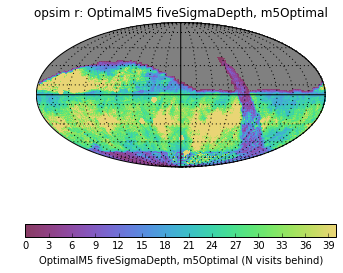

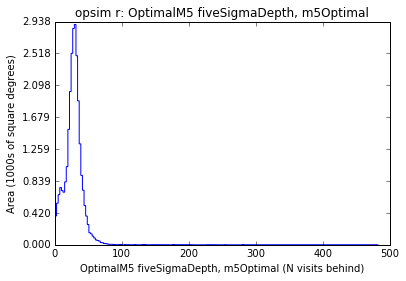

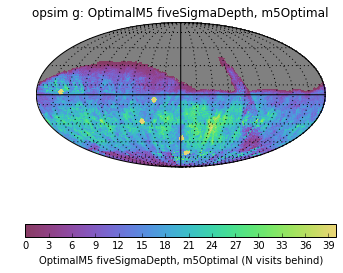

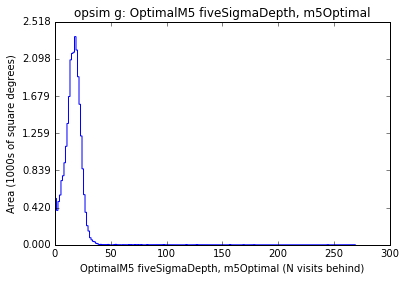

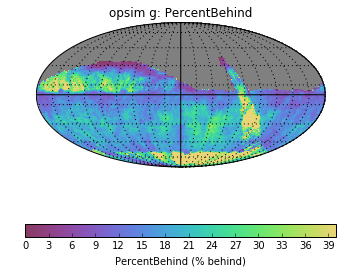

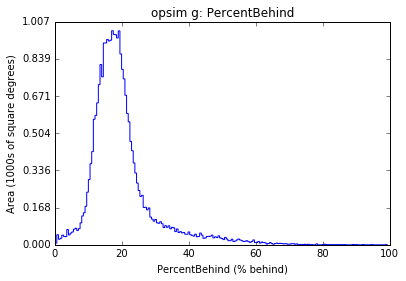

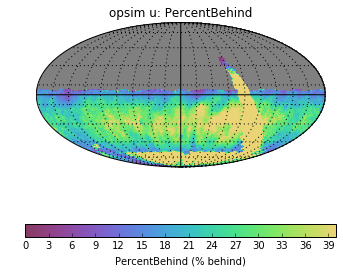

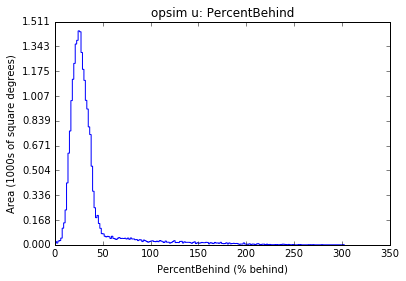

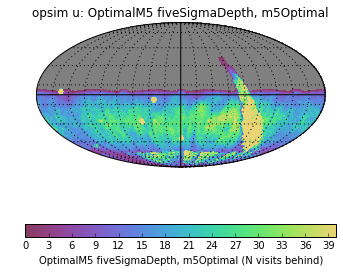

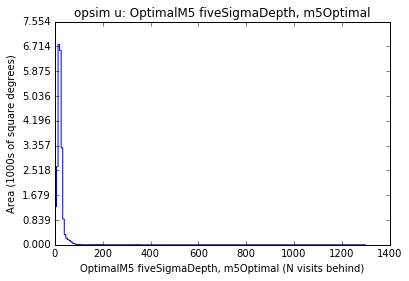

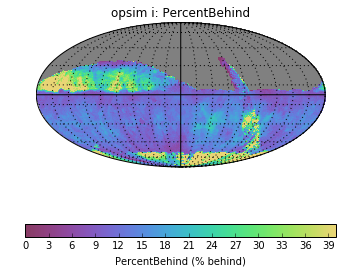

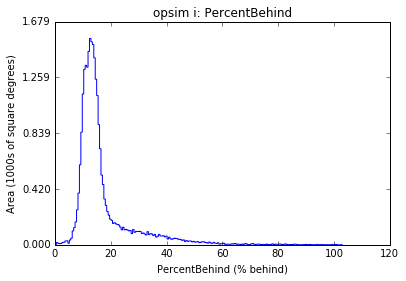

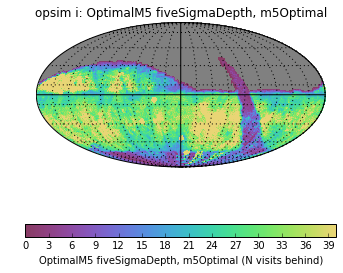

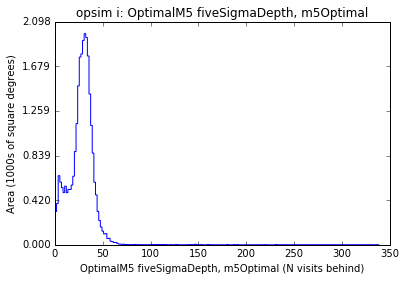

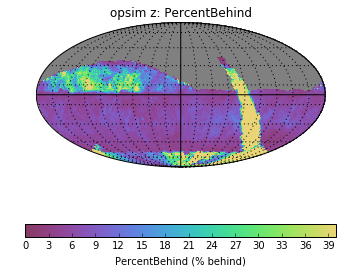

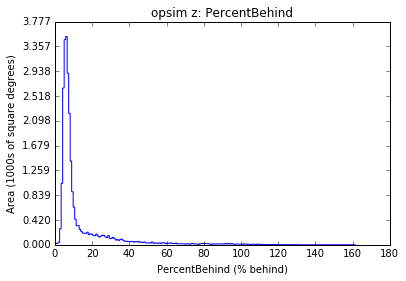

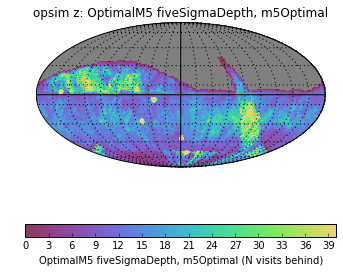

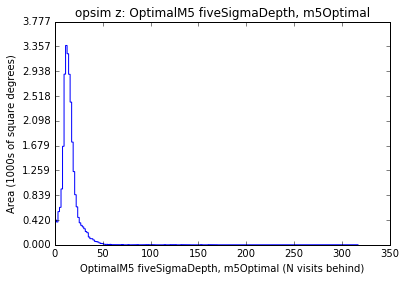

In [9]:
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)